In [99]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [100]:
df= pd.read_csv("data_sclaing.csv", low_memory=False)# 

In [101]:
df.describe()

,Unnamed: 0,x1,x2
count,1025.000000,1025.000000,1025.000000
mean,512.000000,19.510992,30.509924
std,296.036315,3.645604,3.696113
min,0.000000,-3.847150,24.433928
25%,256.000000,18.518495,28.659501
50%,512.000000,19.837920,30.058752
75%,768.000000,21.337207,31.475051
max,1024.000000,26.433766,55.875182


In [102]:
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 

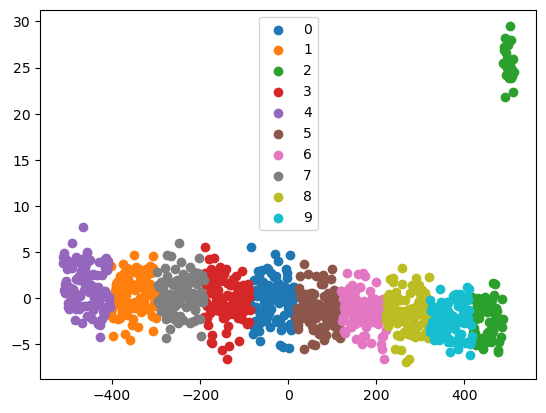

In [103]:
pca = PCA(2)
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,10,1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()